<a href="https://colab.research.google.com/github/rkdhakal/Project_PDDuCNN_Python/blob/master/PDDuCNN_MODEL__TRAINING_FINAL_MODEL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#! pip install tensorflow==1.13.1 tensorflow-gpu==1.13.1

In [0]:
#!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

In [0]:
#Mount Drive
from google.colab import drive
drive.mount("/content/gdrive")

In [0]:
#checking the content of drive
!ls /content/gdrive/My\ Drive

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
log_dir = './log_dir'



In [0]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir)
)


In [0]:
!./ngrok authtoken 2pPGjayP884NJo2crSxwB_3BxYa5f5MdHqM2eZh5iNj
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
https://07a29ccb.ngrok.io


In [0]:
# load dataset file
!unzip "/content/gdrive/My Drive/PlantVillage.zip"

In [0]:
#importing all necessary library
import keras
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping
#from keras import regularizers

Using TensorFlow backend.


In [0]:
classifier = load_model('/content/gdrive/My Drive/MyCNN/Epochs_with_val_loss_and_val_acc:39-0.0401-0.9873.hdf5')

In [0]:

# Initializing the CNN
classifier =Sequential()

# Convolution Step 1
classifier.add(Convolution2D(64,(3,3),strides=(1,1), padding='same', input_shape=(224, 224, 3), activation='relu'))

# Convolution Step 1
classifier.add(Convolution2D(64,(3,3),strides=(1,1), padding='same', activation='relu'))


# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
classifier.add(BatchNormalization())



# Convolution Step 2
classifier.add(Convolution2D(128,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 2
classifier.add(Convolution2D(128,(3,3), strides=(1, 1), padding='same', activation='relu'))


# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
classifier.add(BatchNormalization())



# Convolution Step 3
classifier.add(Convolution2D(256,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 3
classifier.add(Convolution2D(256,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 3
classifier.add(Convolution2D(256,(3,3), strides=(1, 1), padding='same', activation='relu'))


# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
classifier.add(BatchNormalization())



# Convolution Step 4
classifier.add(Convolution2D(512,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 4
classifier.add(Convolution2D(512,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 4
classifier.add(Convolution2D(512,(3,3), strides=(1, 1), padding='same', activation='relu'))


# Max Pooling Step 4
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
classifier.add(BatchNormalization())



# Convolution Step 5
classifier.add(Convolution2D(512,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 5
classifier.add(Convolution2D(512,(3,3), strides=(1, 1), padding='same', activation='relu'))

# Convolution Step 5
classifier.add(Convolution2D(512,(3,3), strides=(1, 1), padding='same', activation='relu'))


# Max Pooling Step 5
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
classifier.add(BatchNormalization())




# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units=4096, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units=4096, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units=1000, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units=38, activation='softmax'))

classifier.summary()

In [0]:
# Compiling the CNN
classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [0]:
# image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 rotation_range=40,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

In [0]:
batch_size = 64

train_data_dir = "/content/PlantVillage/PlantVillage-TrainSet"     # directory of training data

test_data_dir = "/content/PlantVillage/PlantVillage-TestSet"      # directory of test data


In [0]:
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

print(training_set.class_indices)

Found 43755 images belonging to 38 classes.
Found 10550 images belonging to 38 classes.
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato

In [0]:
tensorboardCallback = TensorBoard(log_dir=log_dir,
                                  write_graph=True,
                                  write_images=True,
                                  update_freq='batch')


filepath="/content/gdrive/My Drive/MyCNN/Epochs_with_val_loss_and_val_acc:{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5"
modelCheckpointCallback = ModelCheckpoint(filepath, verbose = 0,save_best_only = False, mode = 'max', period = 1)

In [0]:
early_stopping=EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)


In [0]:
history = classifier.fit_generator(training_set,
                                  steps_per_epoch=training_set.samples//batch_size,
                                  validation_data=test_set,
                                  epochs=50,
                                  validation_steps=test_set.samples//batch_size,
                                  callbacks=[tensorboardCallback, modelCheckpointCallback,early_stopping], initial_epoch=39)

In [0]:
#saving model
filepath="/content/gdrive/My Drive/project/Model_of_PDDuCNN.hdf5"
classifier.save(filepath)


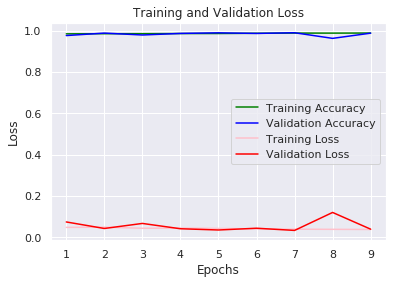

In [38]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()